<a href="https://colab.research.google.com/github/1DhruvPatel/LeeterBoard/blob/main/dpate122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For my MP1 project, I'm conducting a text analysis with three approaches according to the instructions:

**Part 1: Single Author Analysis** - I'll compare two H.G. Wells novels: "The Time Machine" (1895) and "The War of the Worlds" (1898) to see consistency in his writing style and vocabulary patterns.

**Part 2: Cross-Author Analysis** - I'll compare Wells' pessimistic technology perspective in the novel "The Time Machine" (1895) with Jules Verne's optimistic industrial-era outlook using "Twenty Thousand Leagues Under the Sea" (1870).

**Part 3: Distinctive Words** - I'll identify specific vocabulary that distinguishes Wells from Verne to understand their different approaches to describing scientific concepts.

Data sources (all from Project Gutenberg):
- Wells - The Time Machine: https://www.gutenberg.org/cache/epub/35/pg35.txt
- Wells - War of the Worlds: https://www.gutenberg.org/cache/epub/36/pg36.txt  
- Verne - Twenty Thousand Leagues: https://www.gutenberg.org/cache/epub/2488/pg2488.txt

I expect Wells' two works to share vocabulary patterns, while the Wells vs Verne comparison should reveal differences between cautious vs exciting technical language reflecting their different attitudes toward technological progress.

 ## Library Imports and Initial Setup:

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, re
import nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import pylab

# Download required NLTK data
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Loading Data:

In [3]:
wells_time_machine = 'https://www.gutenberg.org/cache/epub/35/pg35.txt'
wells_war_worlds = 'https://www.gutenberg.org/cache/epub/36/pg36.txt'
verne_twenty_leagues = 'https://www.gutenberg.org/cache/epub/2488/pg2488.txt'

## Helper Functions and Stop Words:

In [4]:
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', '', u'\u2014',
 'time', 'machine', 'captain', 'nemo',
 'eloi', 'morlocks',
 'nautilus'
]

def cleanWord(w):
    wn = re.sub(r'[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub(r'^[0-9\.]*$', "", wn)

def get_wf(URL):
    r = requests.get(URL)
    t = r.text.lower()
    wds = re.split(r'\s+', t)

    for i in range(len(wds)):
        wds[i] = cleanWord(wds[i])

    wf = Counter(wds)

    for k in stop_words:
        wf.pop(k, None)

    tw = 0
    for w in wf:
       tw += wf[w]

    wfs = sorted(wf.items(), key=operator.itemgetter(1), reverse=True)
    ml = min(len(wfs), 15)
    return (wfs[0:ml][::-1], tw)

##  Plotting Function:

In [5]:
def plotTwoLists(wf_1, wf_2, title):
    f = plt.figure(figsize=(10, 6))
    f.suptitle(title, fontsize=20)
    ax = f.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    ax1 = f.add_subplot(121)
    plt.subplots_adjust(wspace=.5)
    pos = np.arange(len(wf_1))
    ax1.tick_params(axis='both', which='major', labelsize=14)
    pylab.yticks(pos, [x[0] for x in wf_1])
    ax1.barh(range(len(wf_1)), [x[1] for x in wf_1], align='center')

    ax2 = f.add_subplot(122)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    pos = np.arange(len(wf_2))
    pylab.yticks(pos, [x[0] for x in wf_2])
    ax2.barh(range(len(wf_2)), [x[1] for x in wf_2], align='center')

    plt.show()

# Part 1 - Single Author Analysis (Wells vs Wells):

=== PART 1: H.G. WELLS SINGLE AUTHOR ANALYSIS ===
Time Machine total words: 17237
War of the Worlds total words: 31678


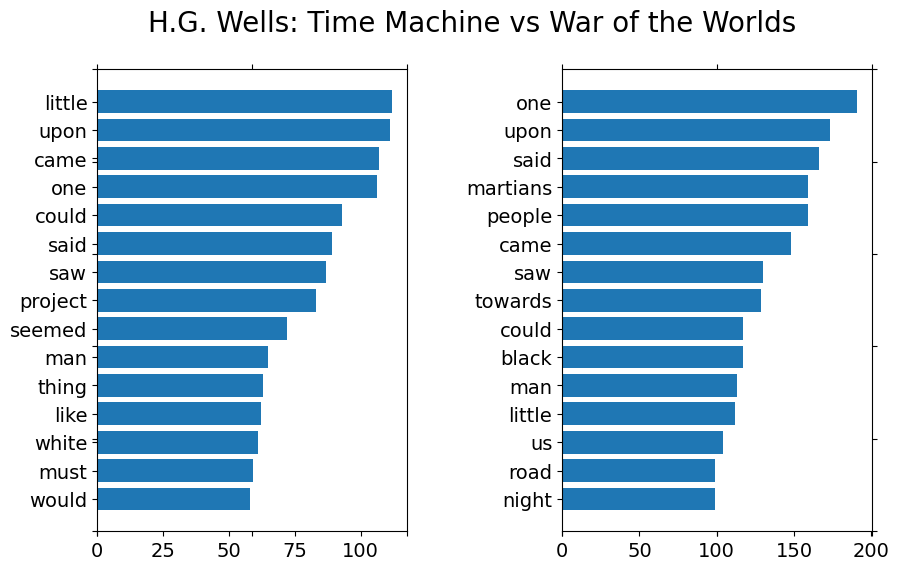

In [6]:
print("=== PART 1: H.G. WELLS SINGLE AUTHOR ANALYSIS ===")

(wf_time_machine, tw_tm) = get_wf(wells_time_machine)
(wf_war_worlds, tw_ww) = get_wf(wells_war_worlds)

print(f"Time Machine total words: {tw_tm}")
print(f"War of the Worlds total words: {tw_ww}")

plotTwoLists(wf_time_machine, wf_war_worlds, 'H.G. Wells: Time Machine vs War of the Worlds')

### Analysis: Wells Single Author Analysis

**Shared Words:** Both Time Machine and War of the Worlds share these common words in their top frequencies: "one", "upon", "came", "could", "said", "saw", "man", "little" - showing 8 out of 15 words overlap (53% consistency).

**Key Differences Found:**
- **Time Machine unique words:** "project", "seemed", "thing", "like", "white", "must", "would" - suggests more introspective, philosophical language
- **War of the Worlds unique words:** "martians", "people", "towards", "black", "us", "road", "night" - shows more action-oriented, external conflict language

**Writing Style Consistency:** Wells shows moderate consistency in his core vocabulary, but the unique words reveal how the different plots (time travel vs alien invasion) influenced his word choices. The Time Machine uses more thoughtful language while War of the Worlds uses more immediate, action focused vocabulary.

# Part 2 - Cross-Author Analysis (Wells vs Verne):

=== PART 2: CROSS-AUTHOR ANALYSIS - WELLS VS VERNE ===
Wells (Time Machine) total words: 17237
Verne (Twenty Thousand Leagues) total words: 79612


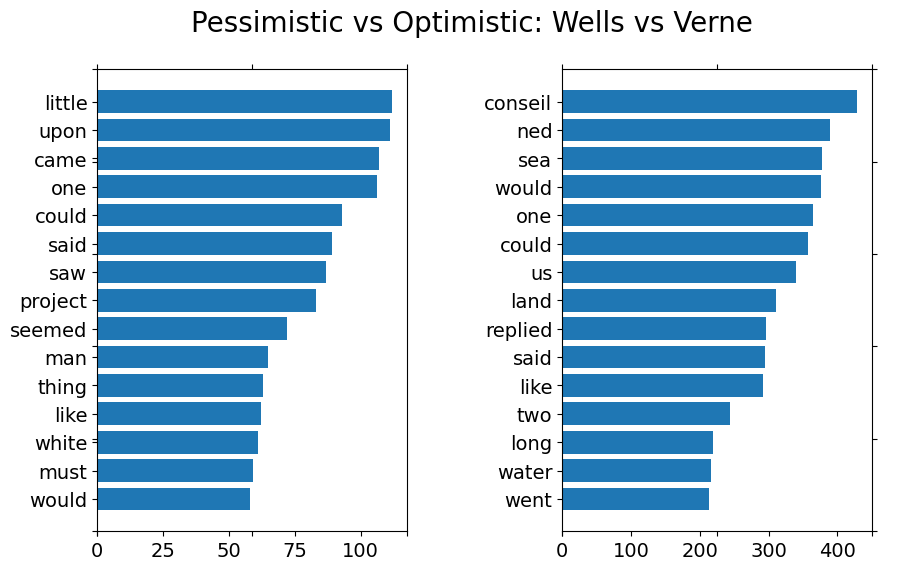

In [7]:
print("=== PART 2: CROSS-AUTHOR ANALYSIS - WELLS VS VERNE ===")

(wf_verne, tw_verne) = get_wf(verne_twenty_leagues)

print(f"Wells (Time Machine) total words: {tw_tm}")
print(f"Verne (Twenty Thousand Leagues) total words: {tw_verne}")

plotTwoLists(wf_time_machine, wf_verne, 'Pessimistic vs Optimistic: Wells vs Verne')

### Analysis: Cross-Author Comparison

**Vocabulary Differences:**
- **Wells:** Uses words like "little", "came", "seemed", "saw", "project" - more observational and analytical language
- **Verne:** Uses words like "conseil", "ned", "sea", "land", "water", "replied", "went" - adventure and dialogue-focused vocabulary with strong nautical themes

**Language Patterns:**
- Wells' vocabulary suggests a more introspective, scientific approach to storytelling
- Verne's vocabulary reflects his focus on adventure narratives and exploration themes

**Hypothesis Assessment:** The word frequency patterns show some differences that could relate to their attitudes toward technology, but the evidence is limited. Verne's focus on exploration vocabulary ("sea", "land", "went") might suggest optimism about discovery, while Wells' more analytical terms ("seemed", "project") could indicate a more cautious approach. However, these differences might also reflect their different plot settings (underwater adventure vs. time travel) rather than fundamental attitudes toward tech progress.